<a href="https://colab.research.google.com/github/thiru2024/Pathways-prediction-through-clustering/blob/main/PCA_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [ ]:
path = pd.read_csv('/content/drive/My Drive/old-m-integrated-features.csv')

In [ ]:
df = pd.DataFrame(path)
df=df.drop(['HMDB_ID','NAME','SMILES','InChI','INCHIKEY','IUPACName','CHEMICAL_FORMULA','CID'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Columns: 200 entries, Column2 to ConformerCount3D
dtypes: float64(200)
memory usage: 5.2 MB


In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.skew()

Column2                     16.050417
Column3                     58.180745
Column4                     41.121749
Column5                     14.010559
Column6                     58.180745
                              ...    
FeatureRingCount3D           1.521957
FeatureHydrophobeCount3D     3.179776
ConformerModelRMSD3D         1.752372
EffectiveRotorCount3D        1.392648
ConformerCount3D            -1.379513
Length: 200, dtype: float64

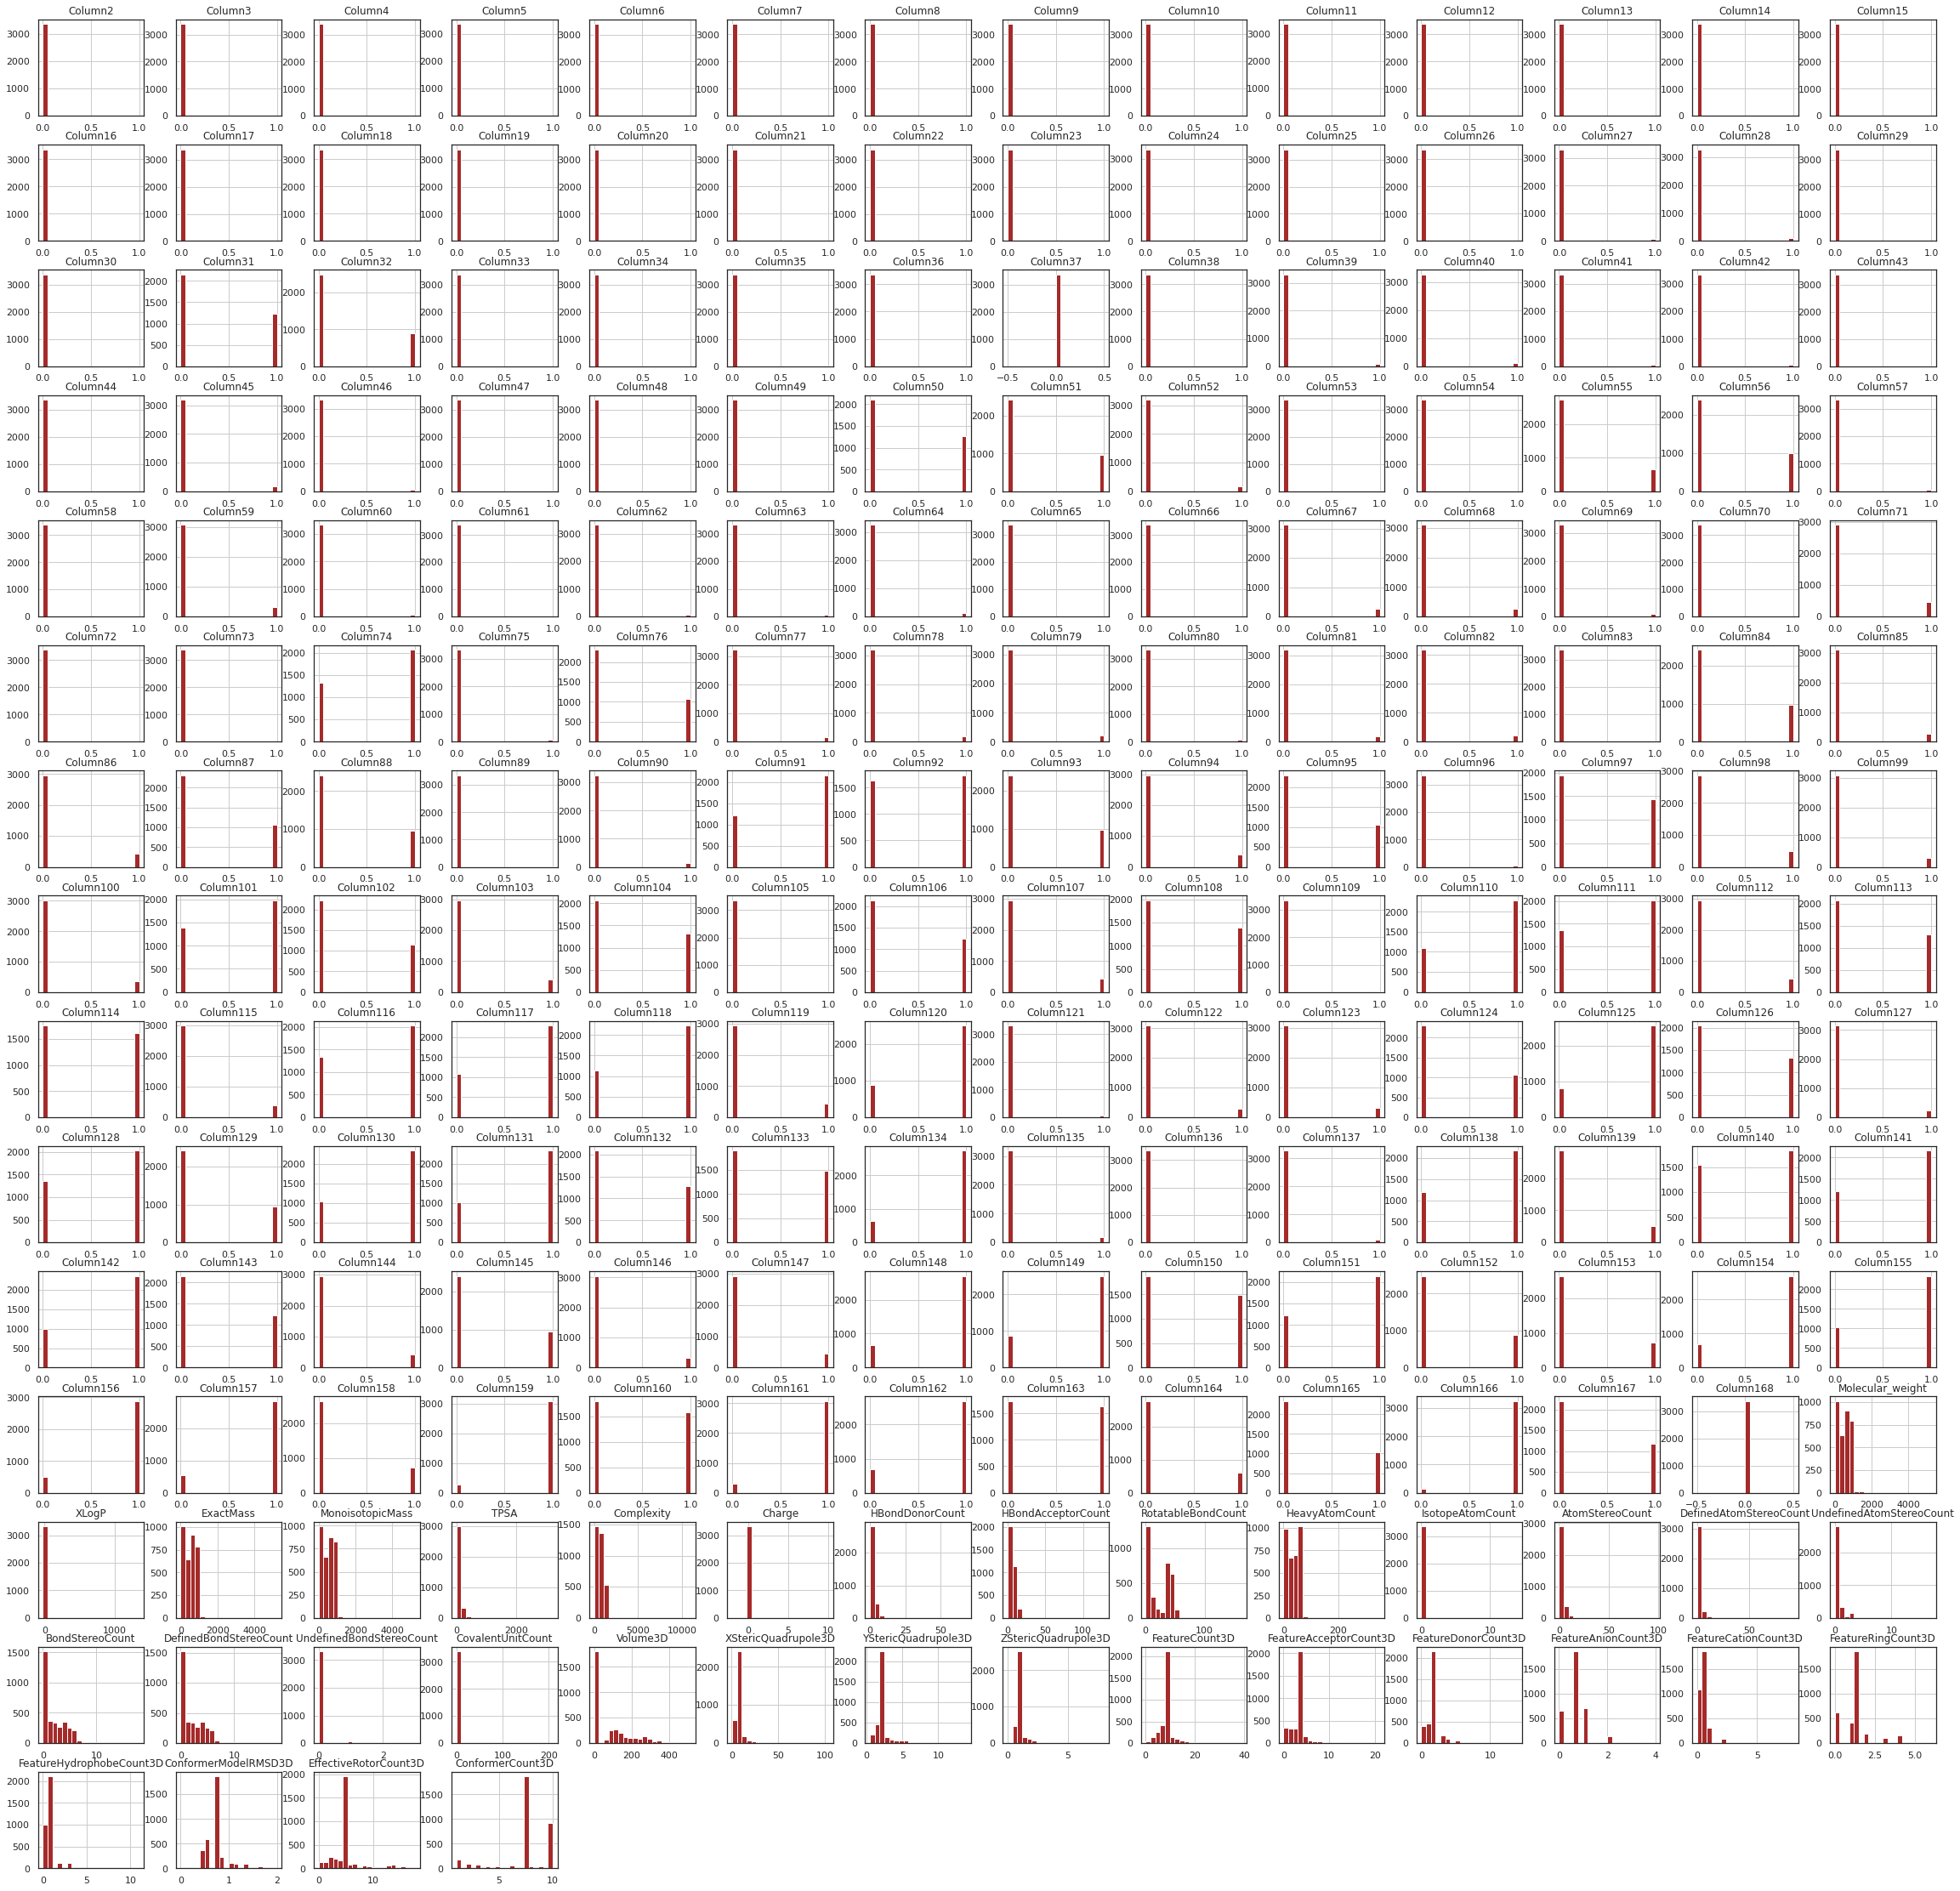

In [ ]:
sns.set(style='white',font_scale=1, rc={'figure.figsize':(40,40)})
ax=df.hist(bins=20,color='brown' )

In [ ]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 95.80%


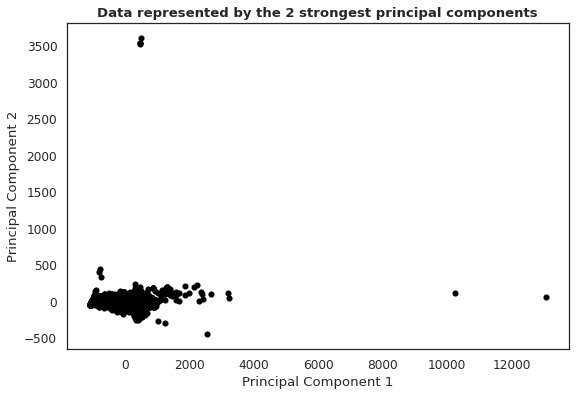

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='black',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

In [ ]:
import sklearn.cluster as cluster

inertia = []
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df)
    silhouette[i] = silhouette_score(df, kmeans.labels_, metric='euclidean')

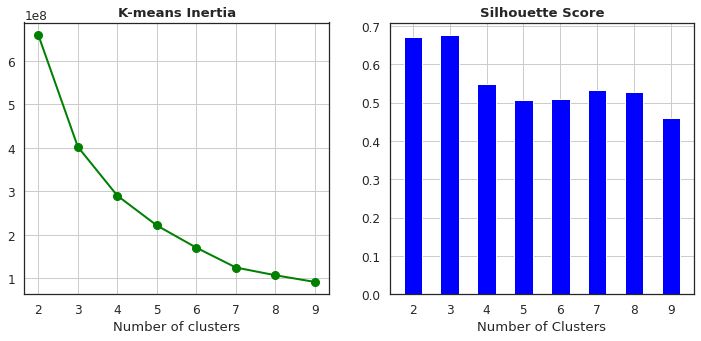

In [ ]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='green')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [ ]:
kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(df)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


0    1788
1    1595
2       2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

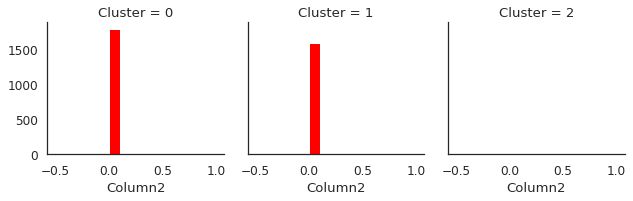

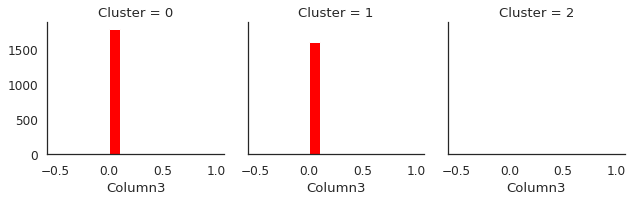

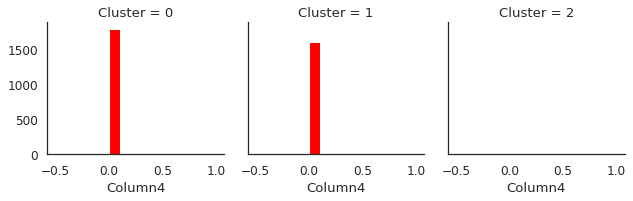

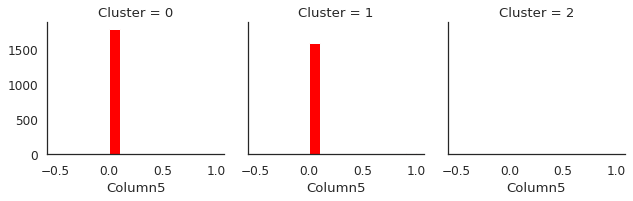

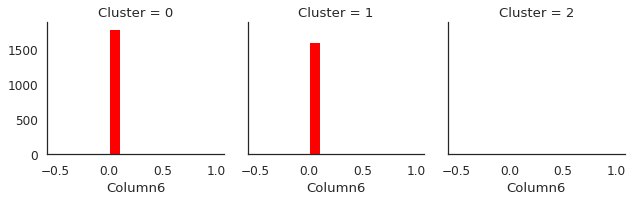

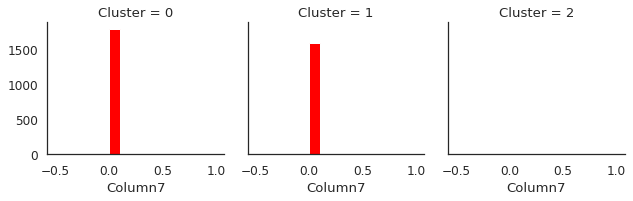

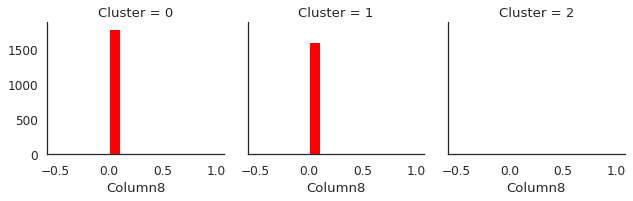

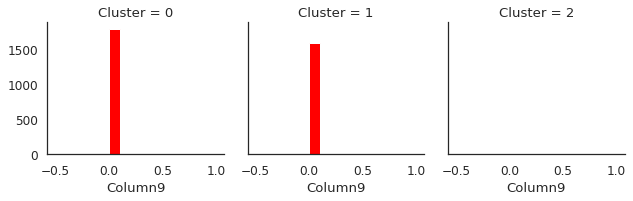

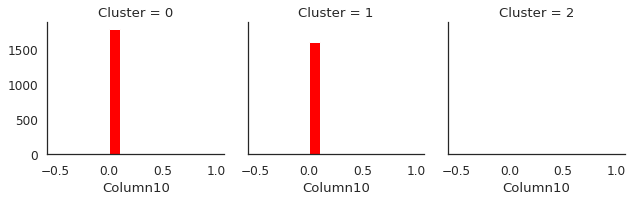

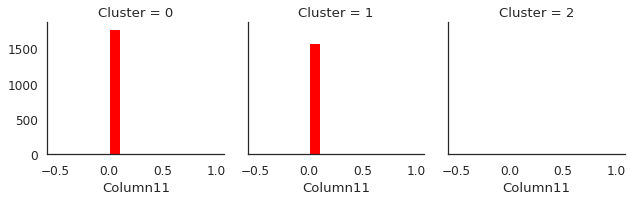

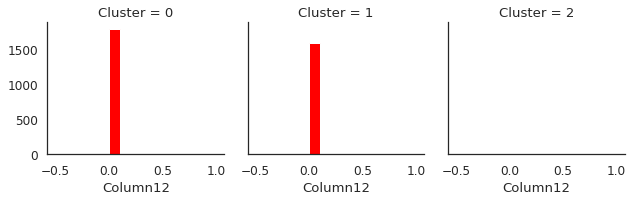

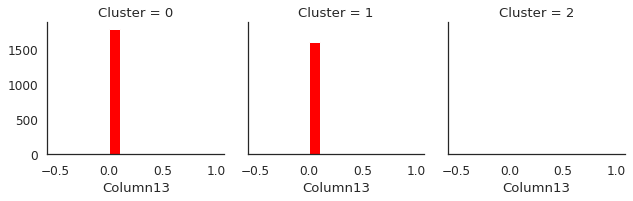

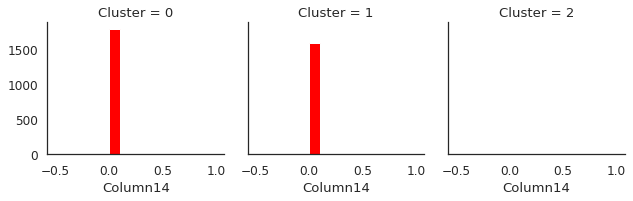

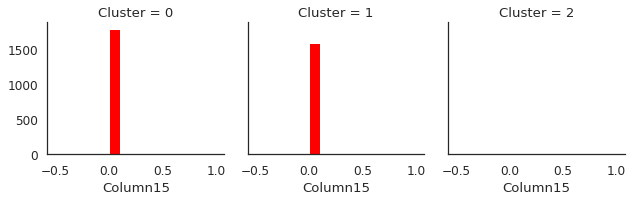

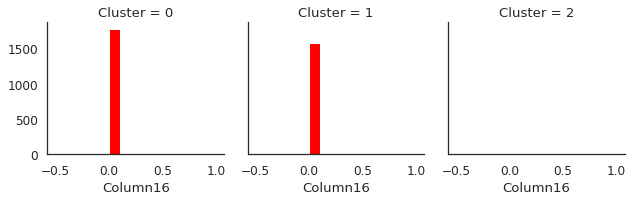

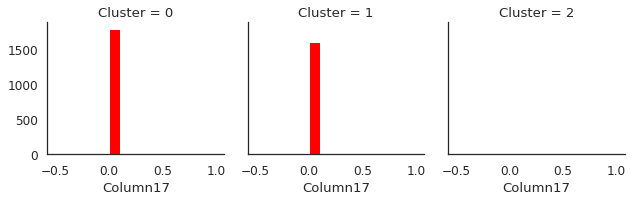

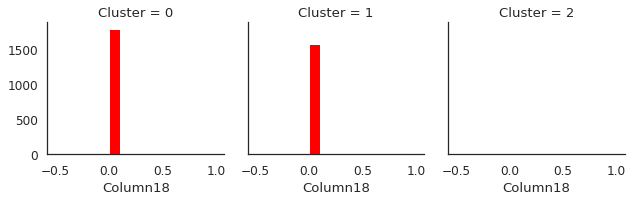

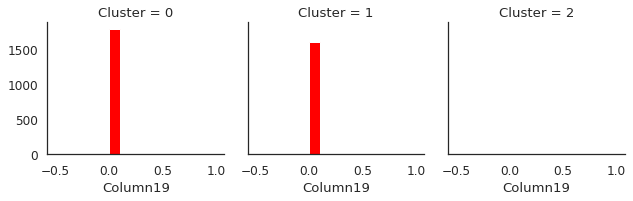

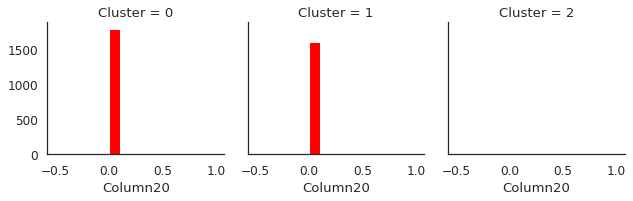

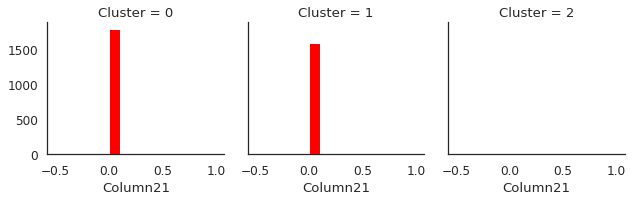

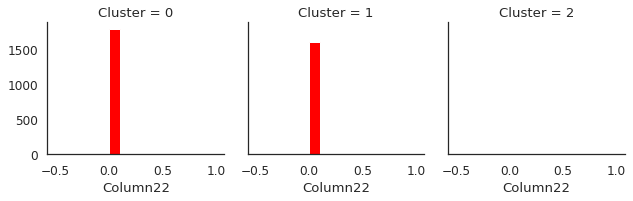

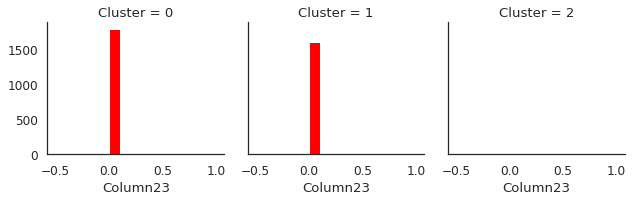

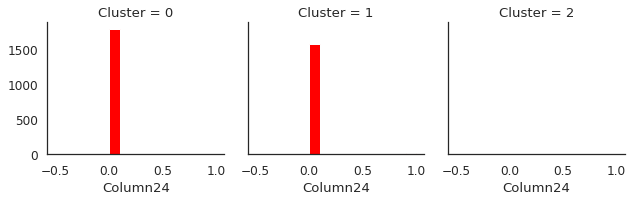

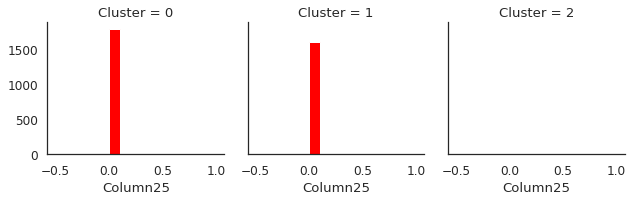

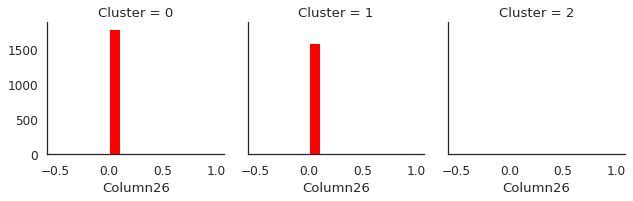

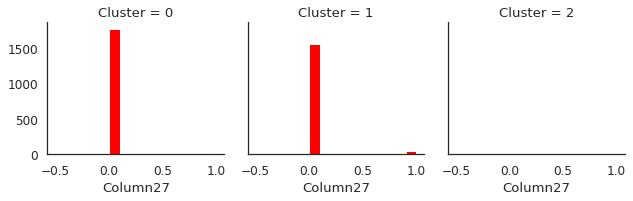

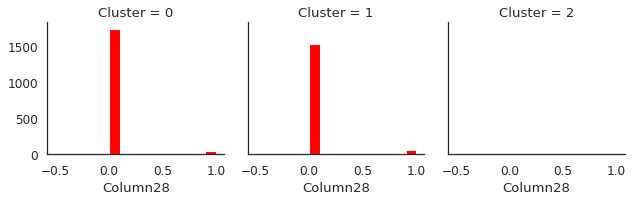

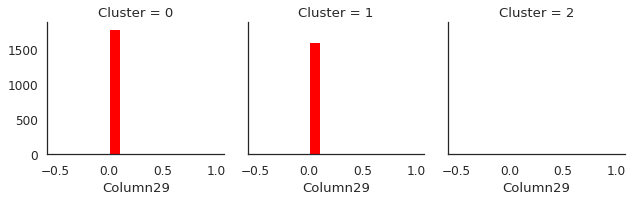

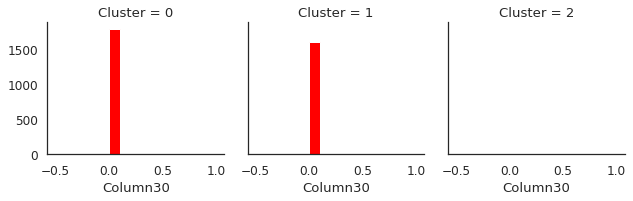

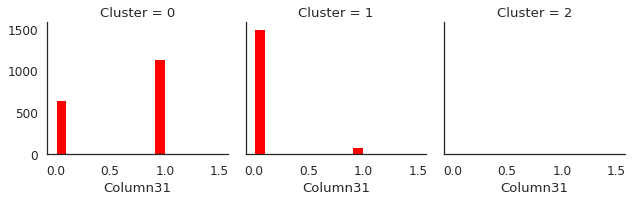

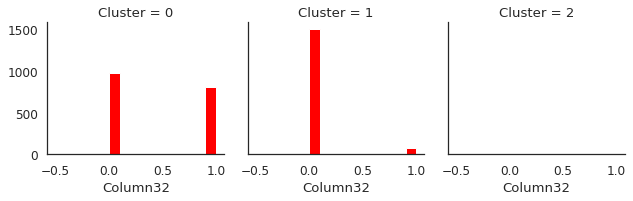

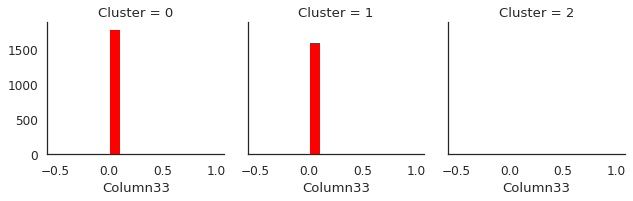

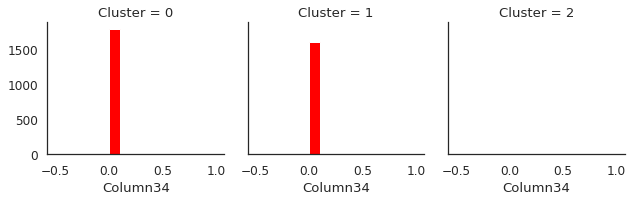

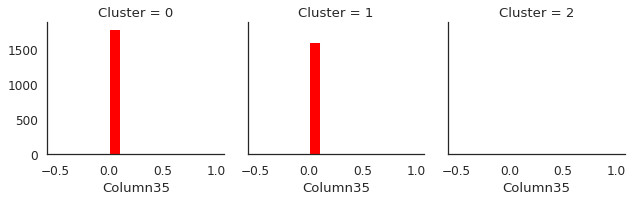

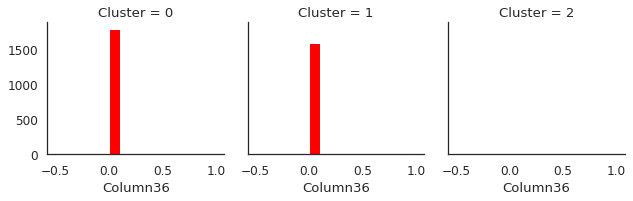

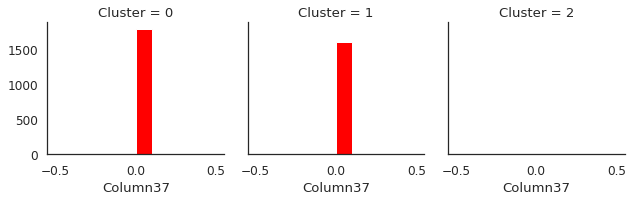

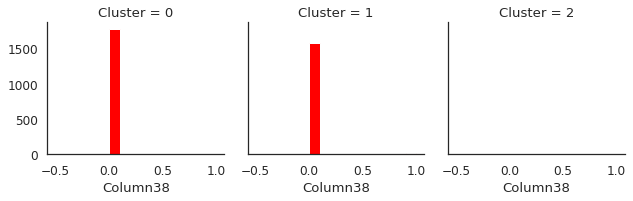

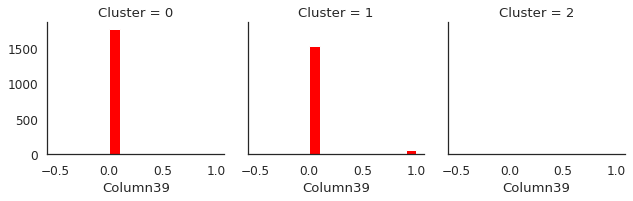

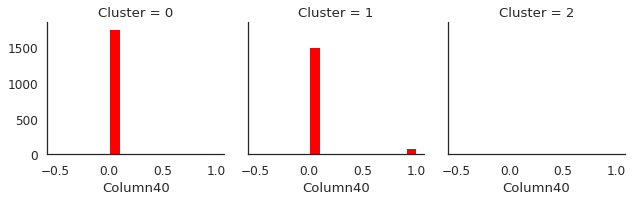

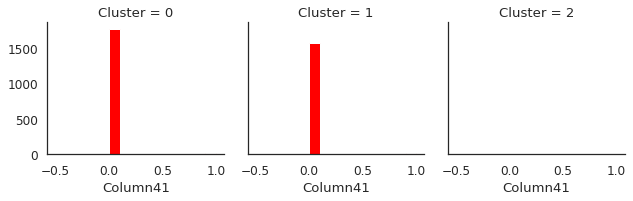

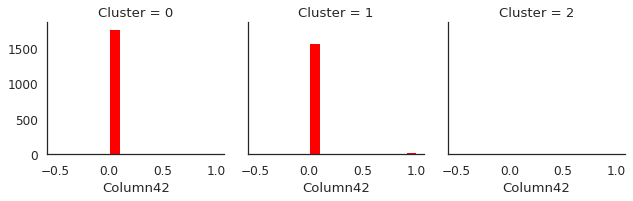

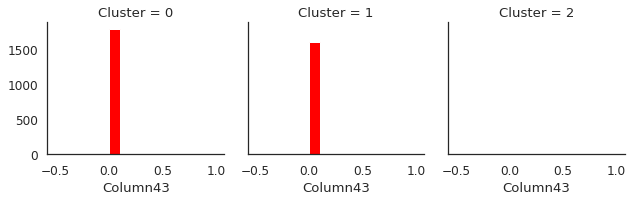

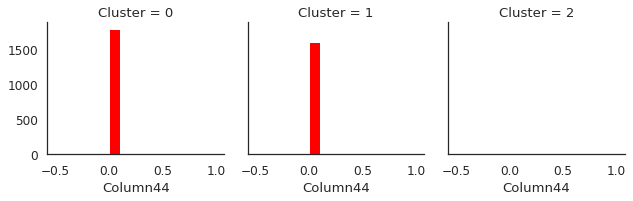

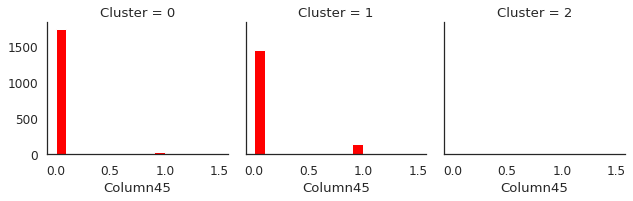

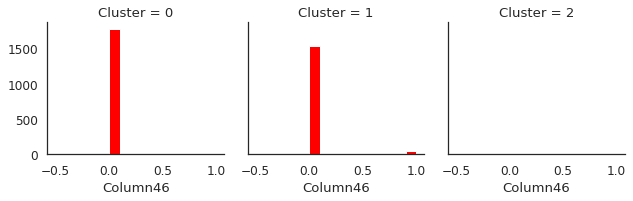

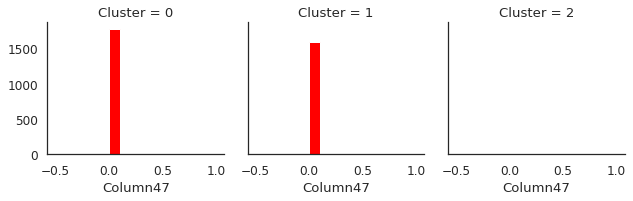

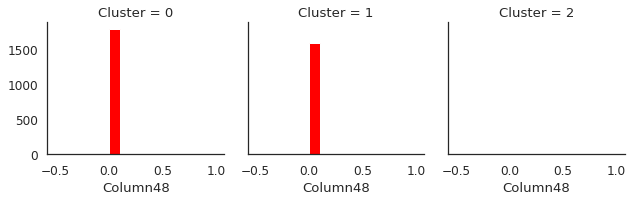

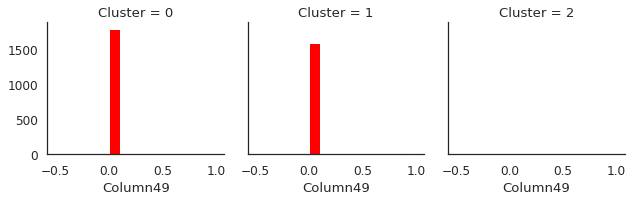

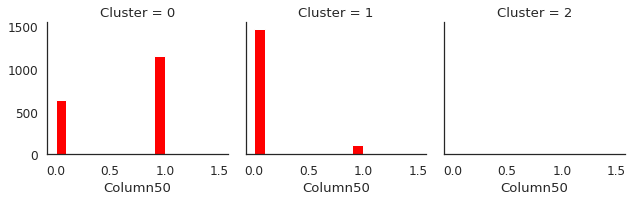

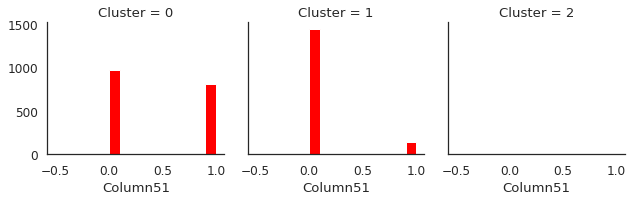

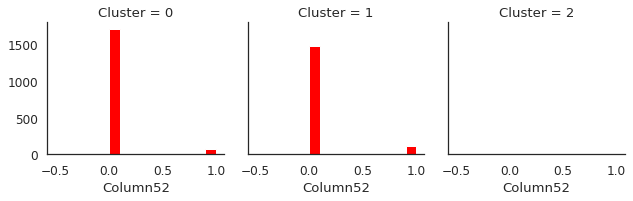

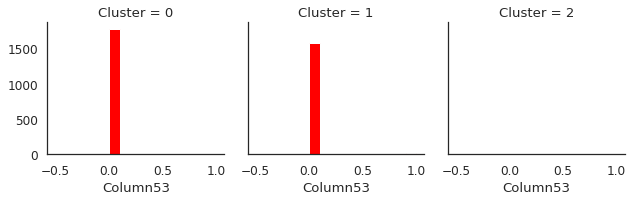

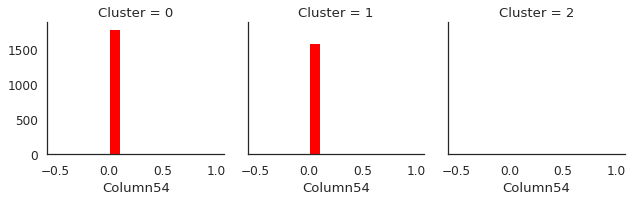

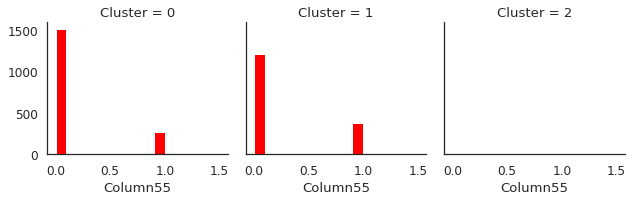

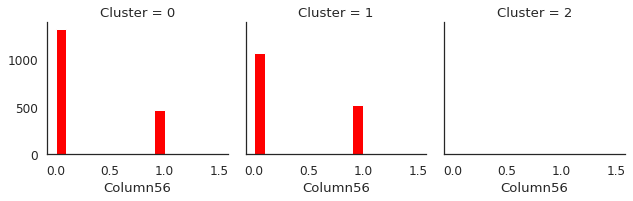

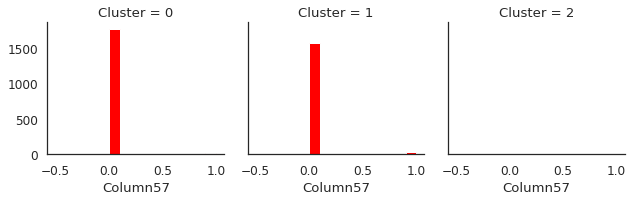

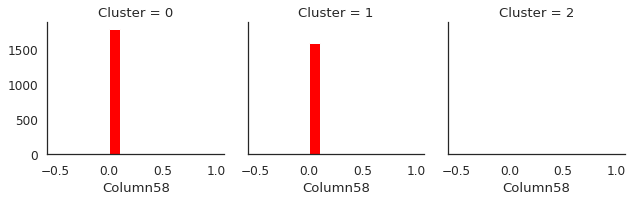

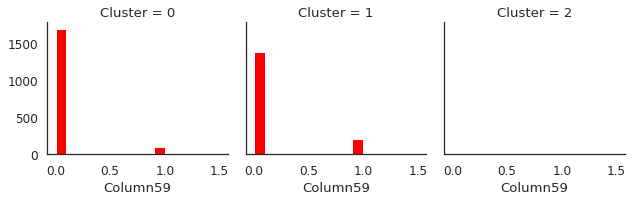

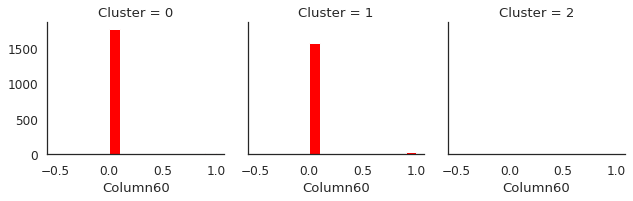

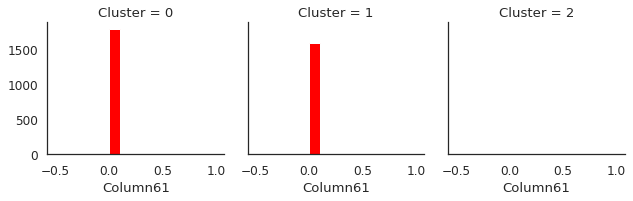

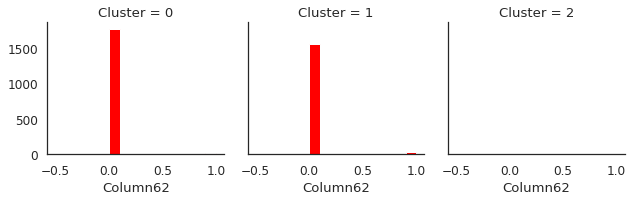

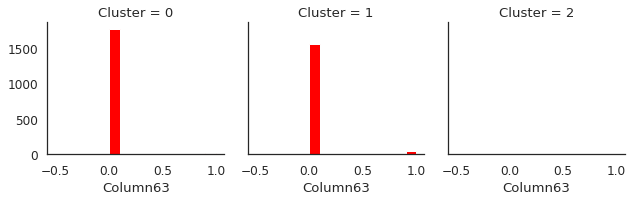

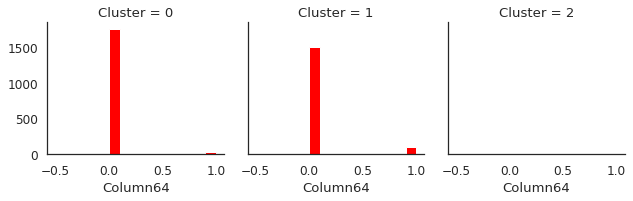

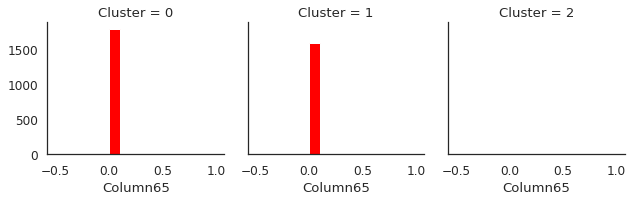

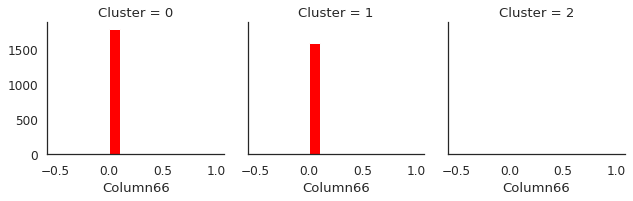

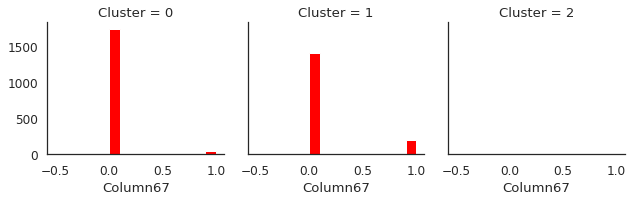

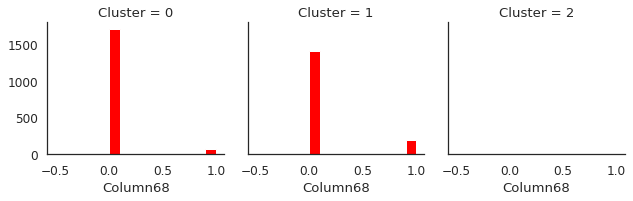

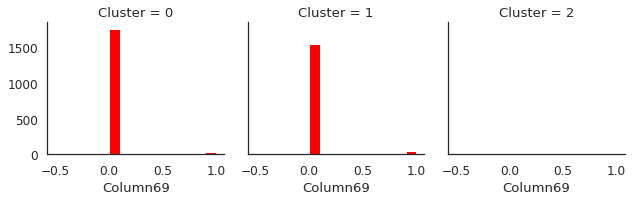

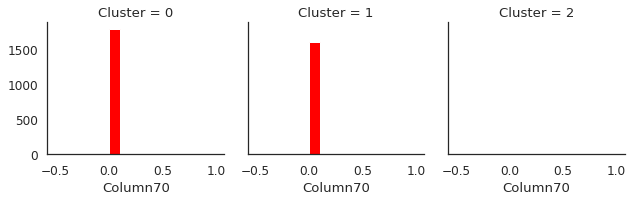

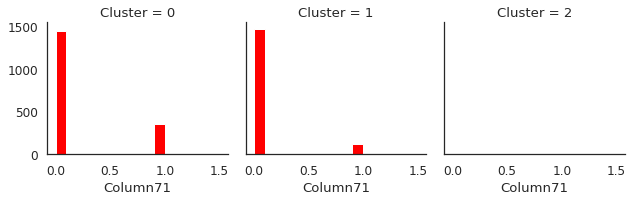

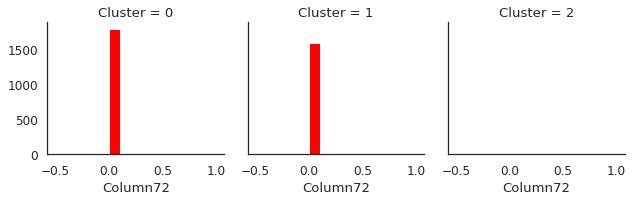

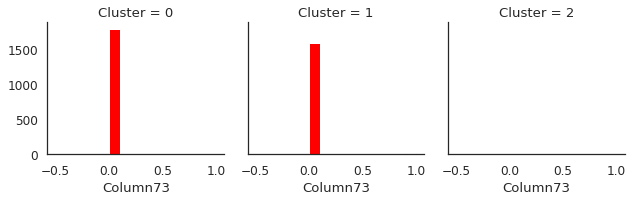

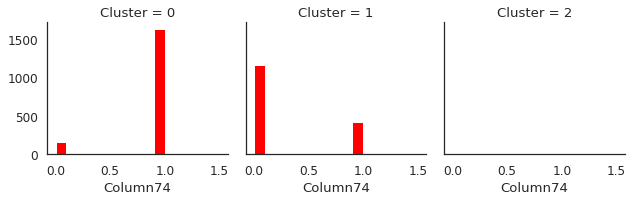

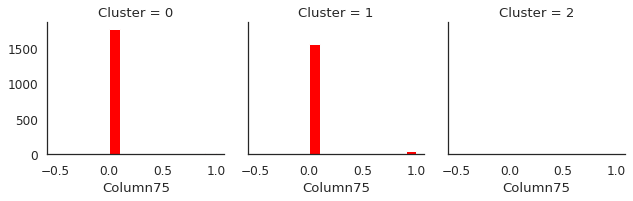

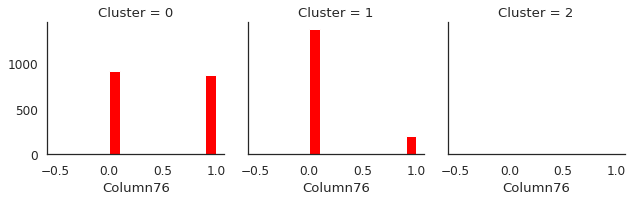

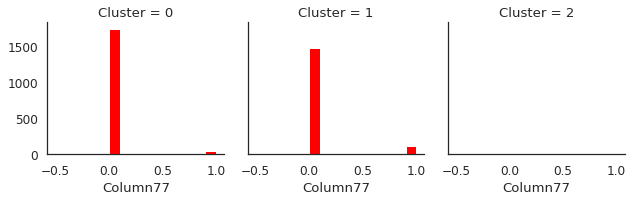

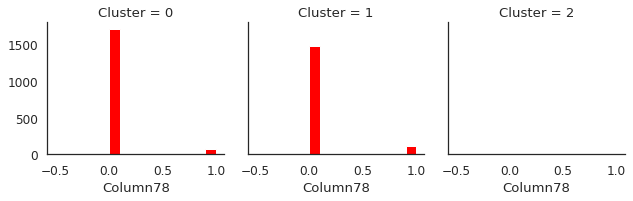

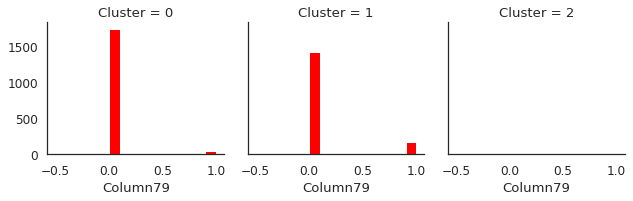

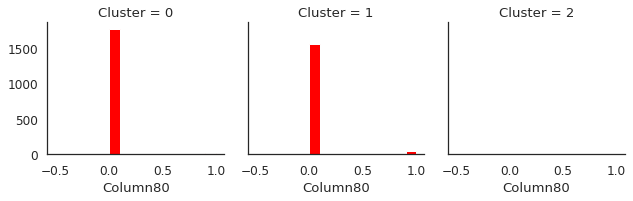

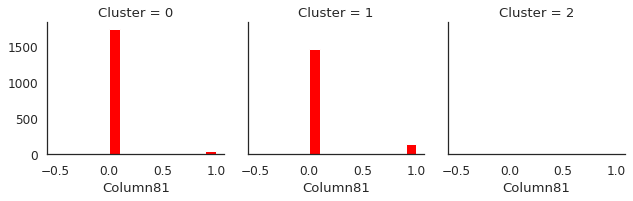

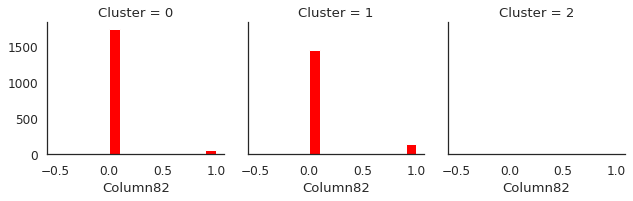

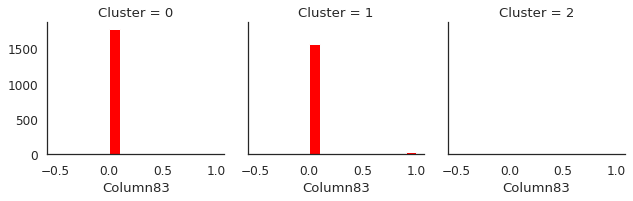

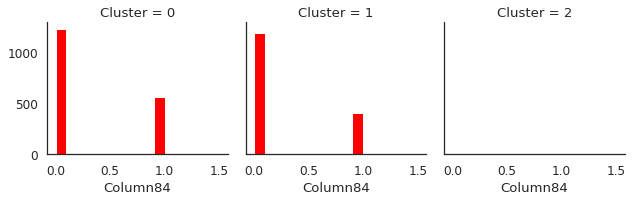

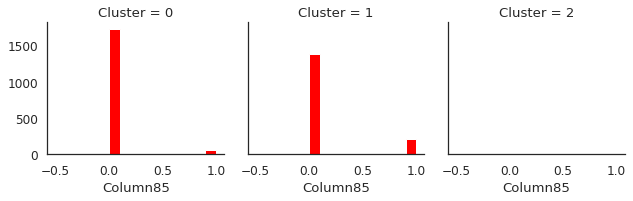

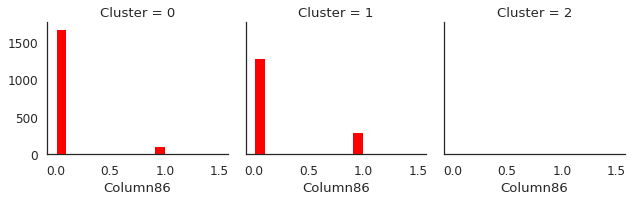

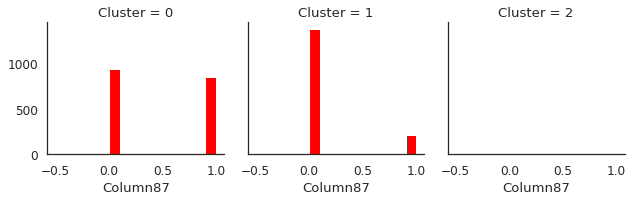

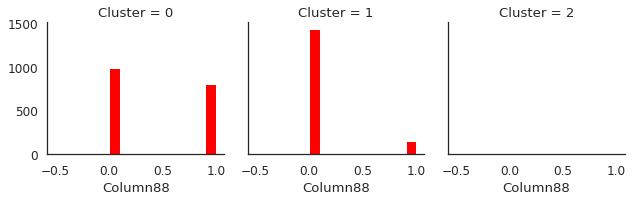

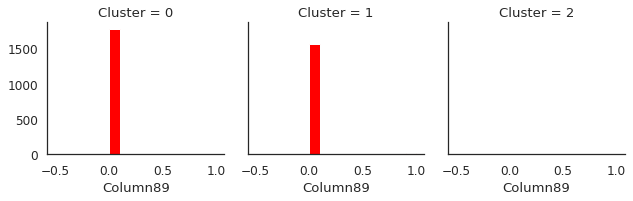

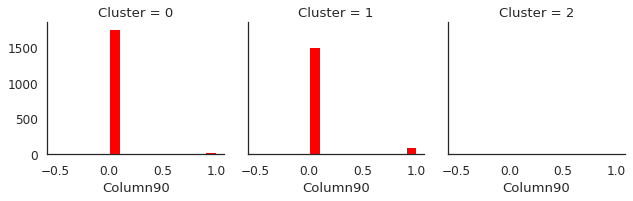

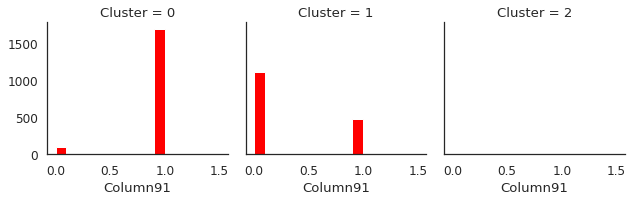

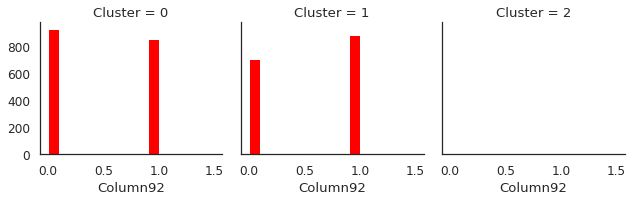

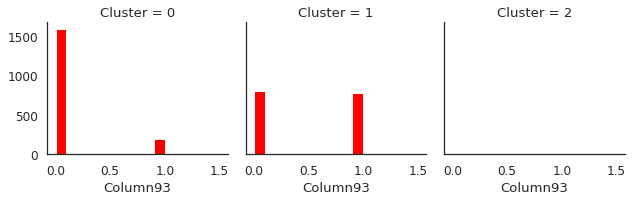

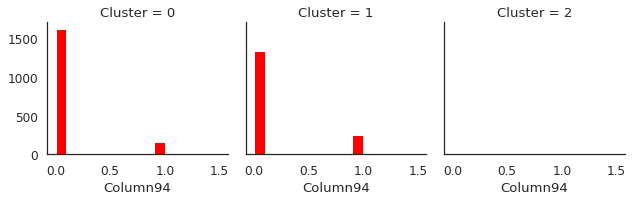

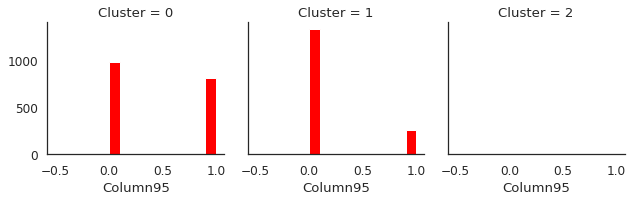

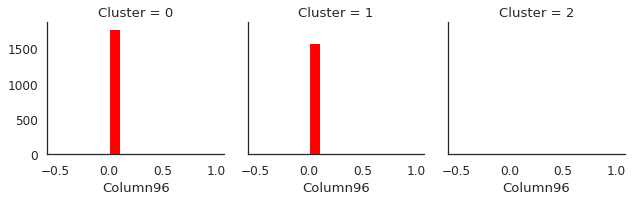

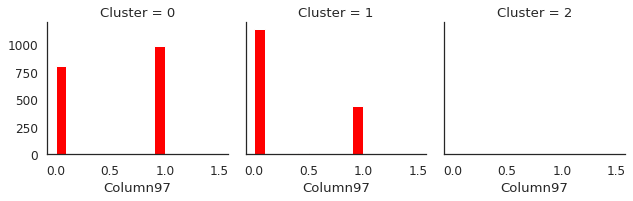

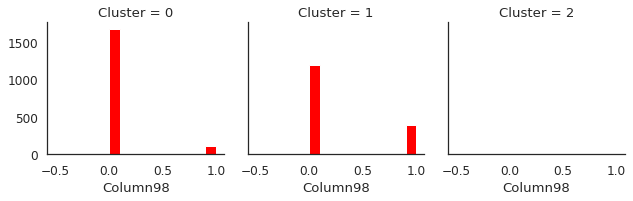

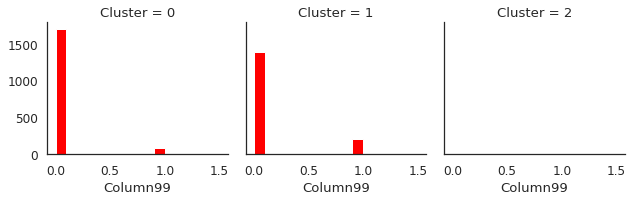

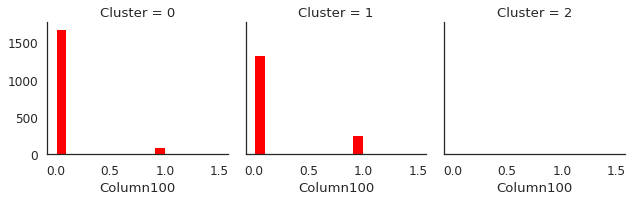

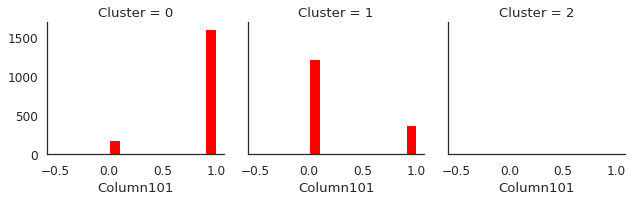

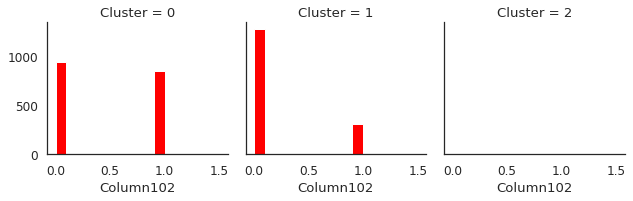

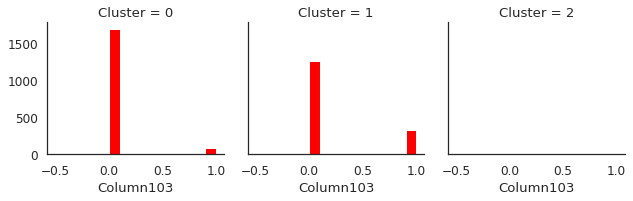

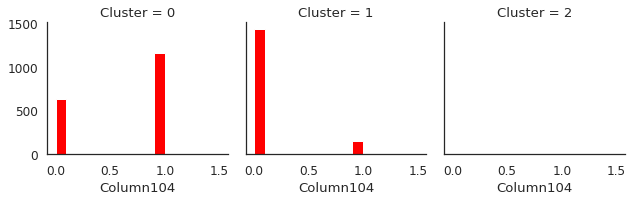

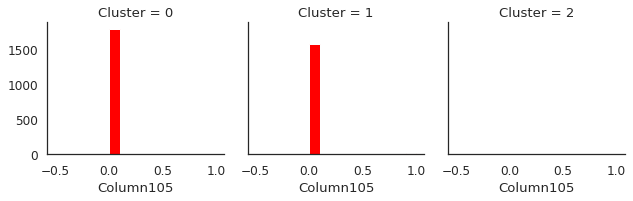

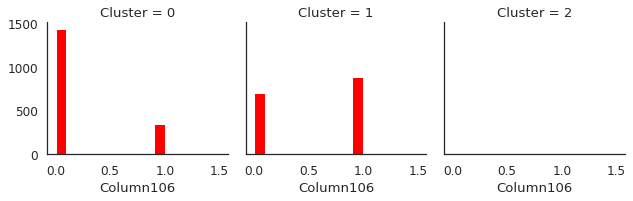

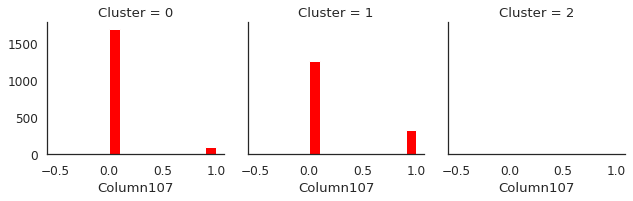

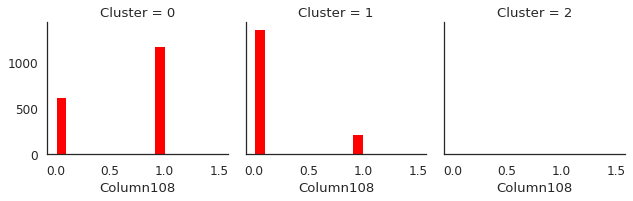

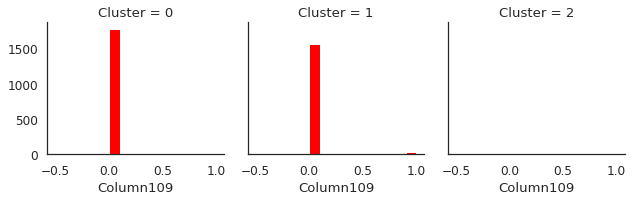

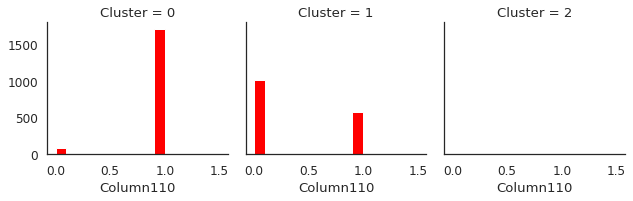

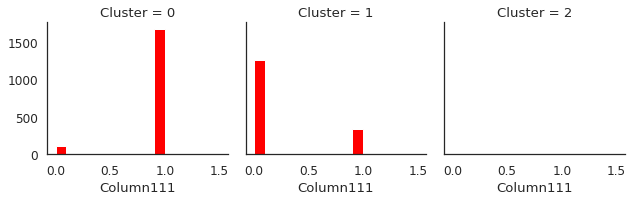

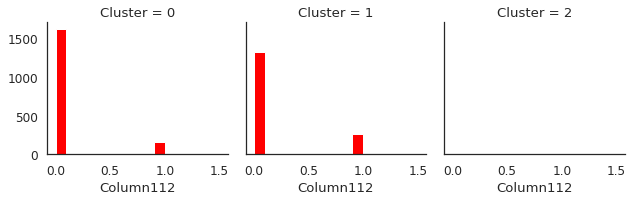

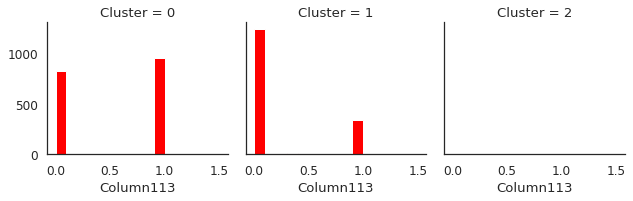

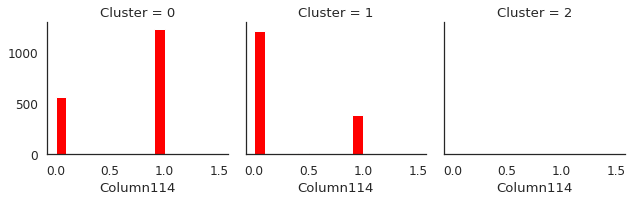

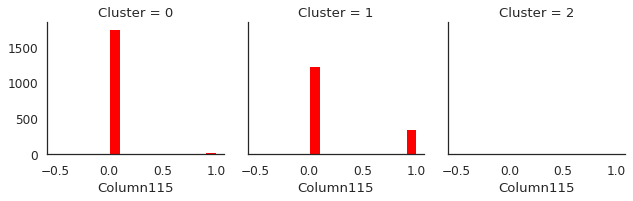

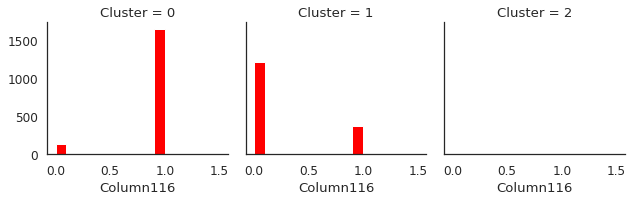

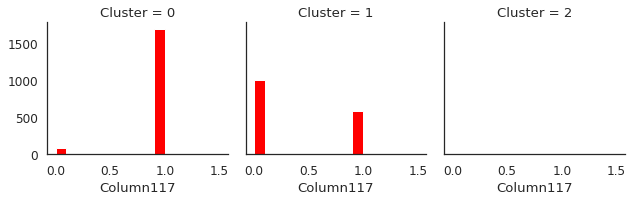

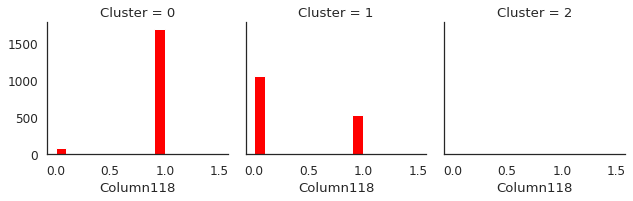

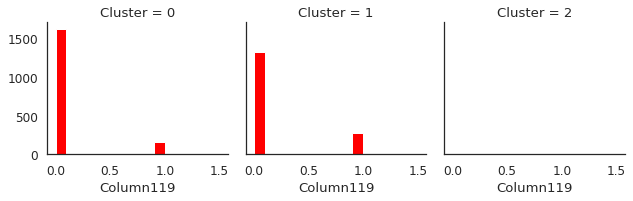

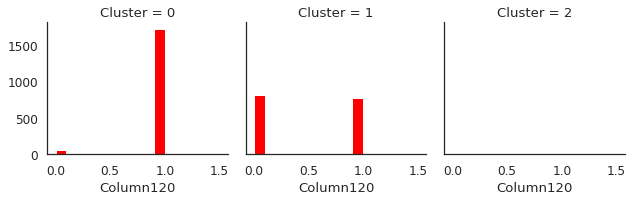

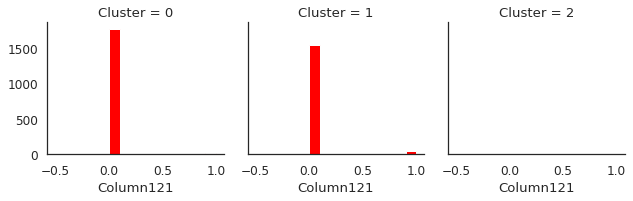

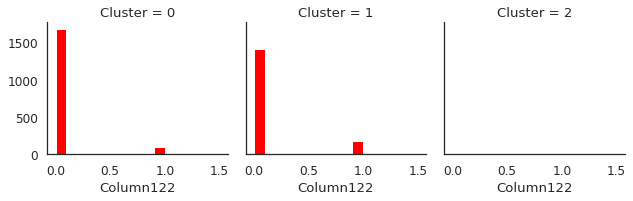

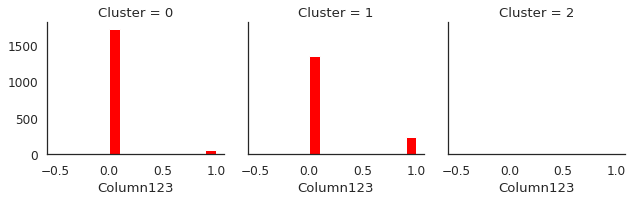

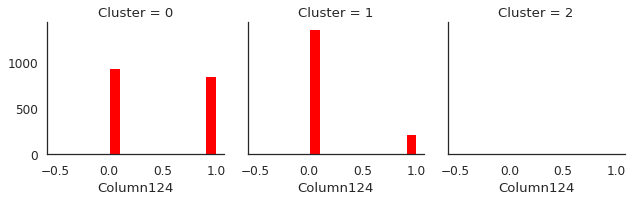

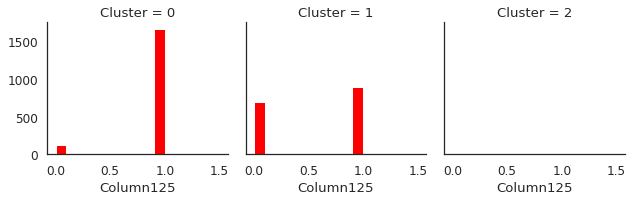

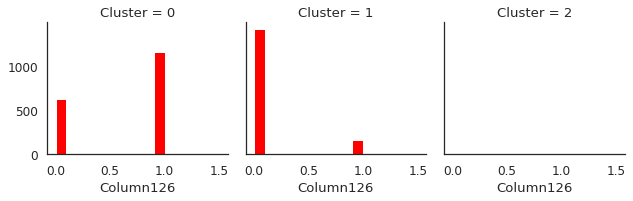

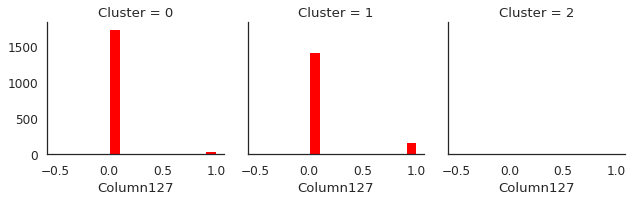

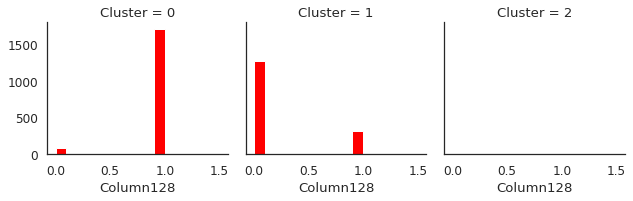

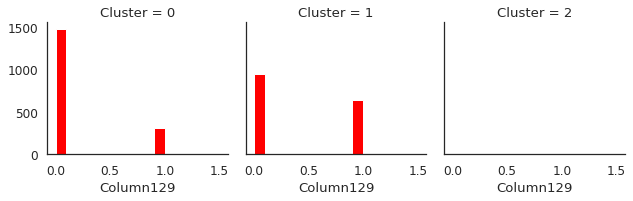

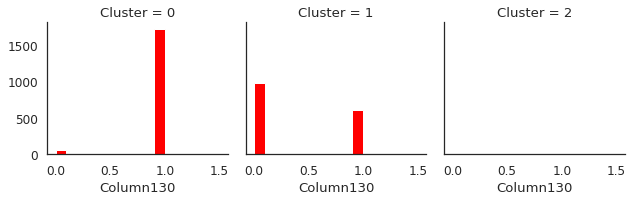

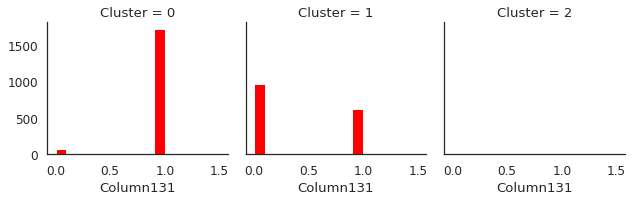

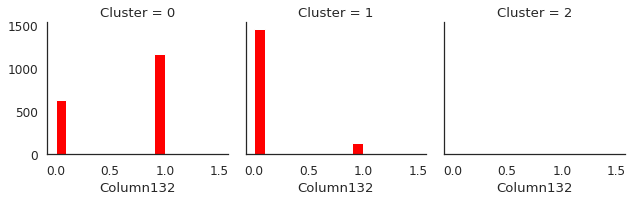

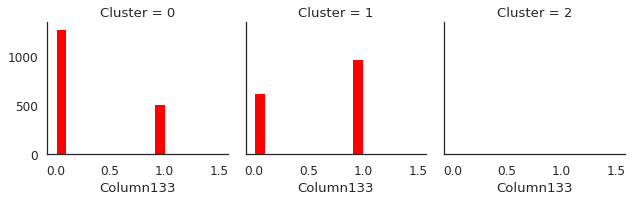

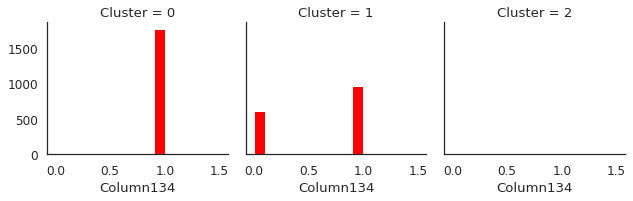

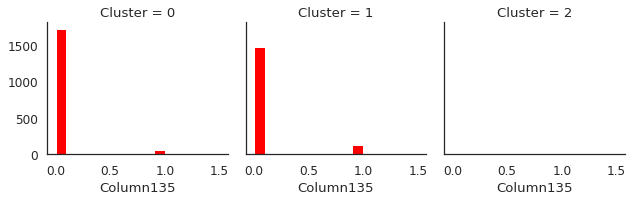

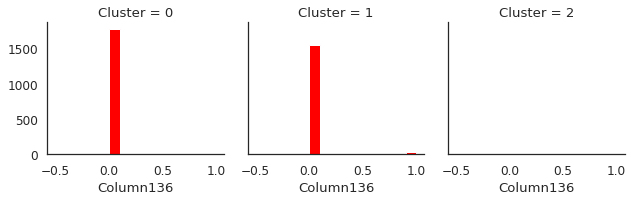

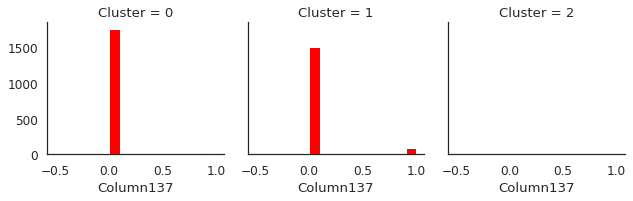

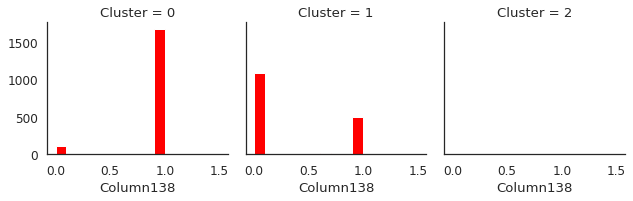

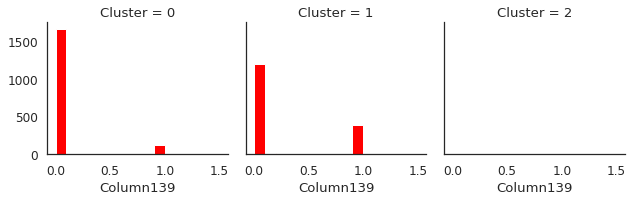

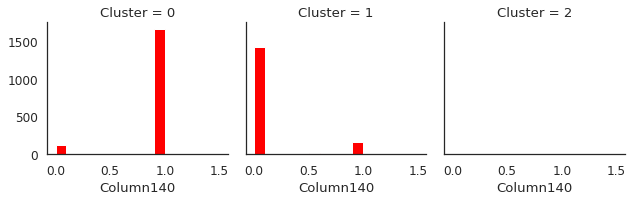

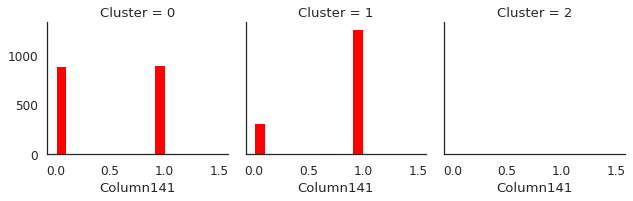

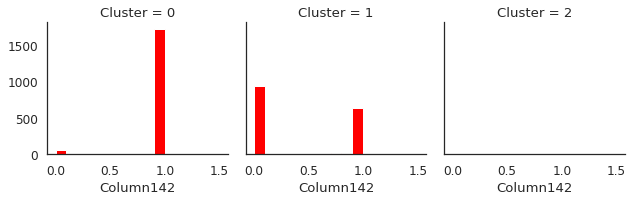

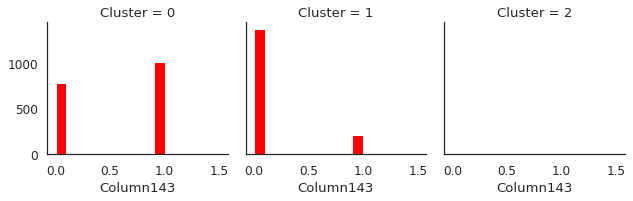

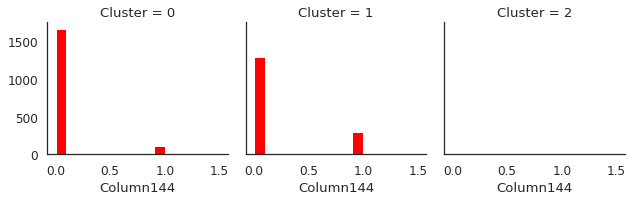

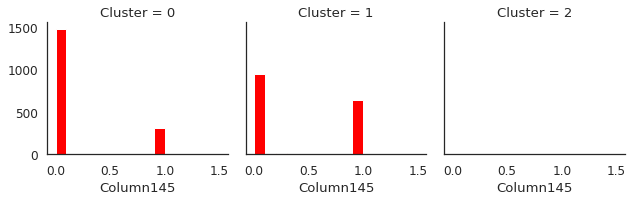

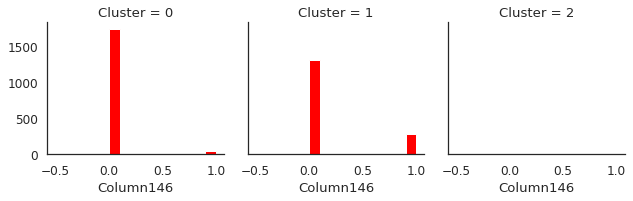

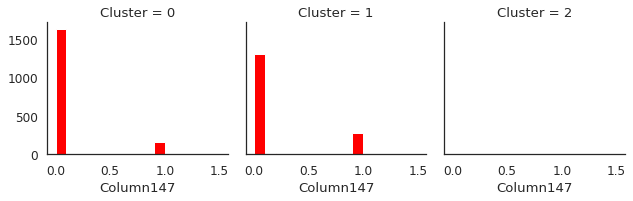

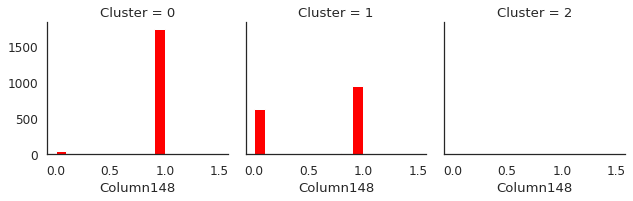

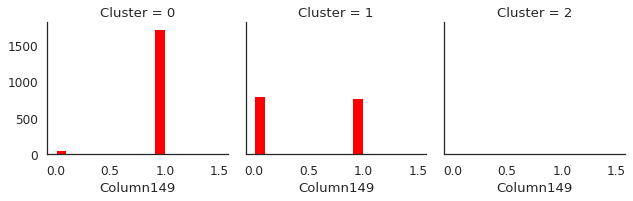

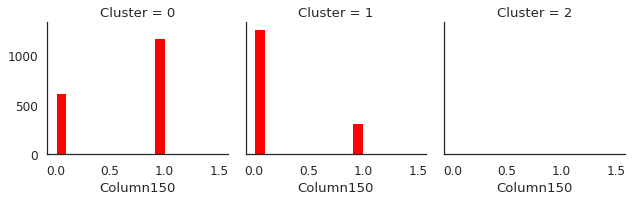

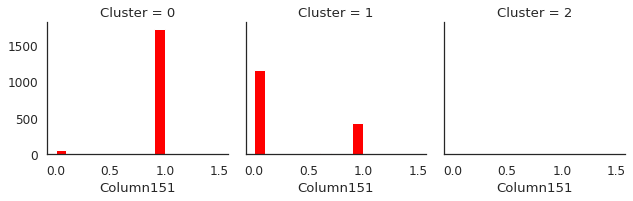

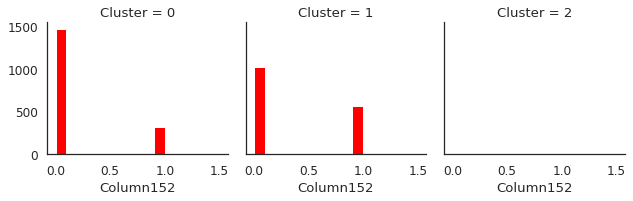

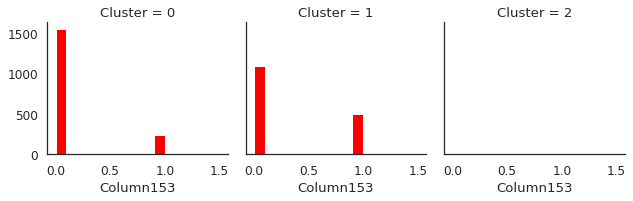

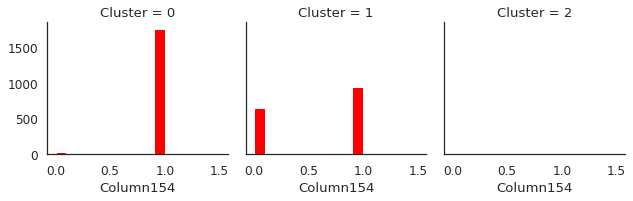

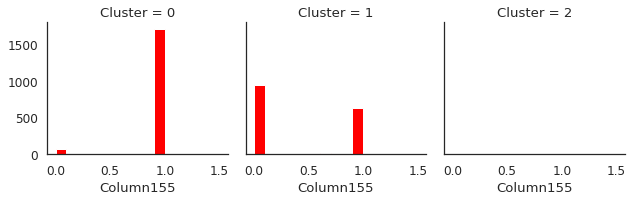

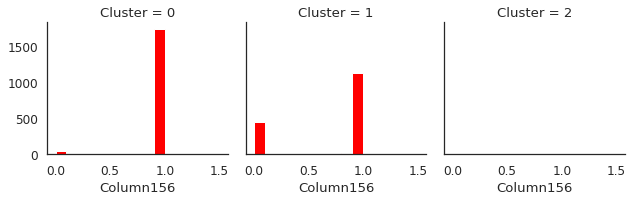

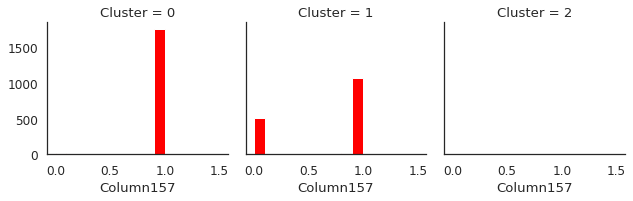

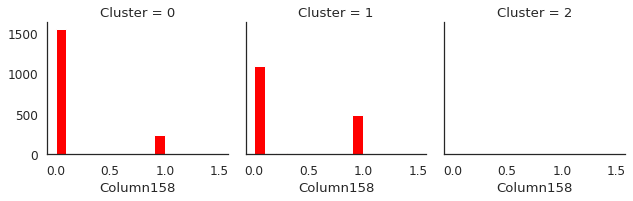

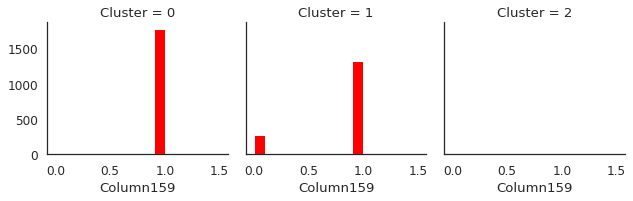

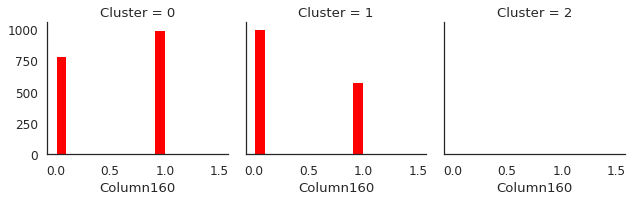

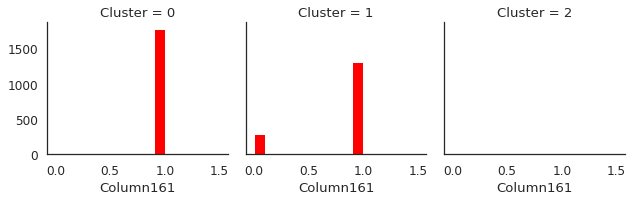

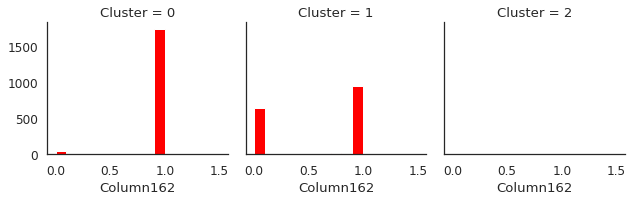

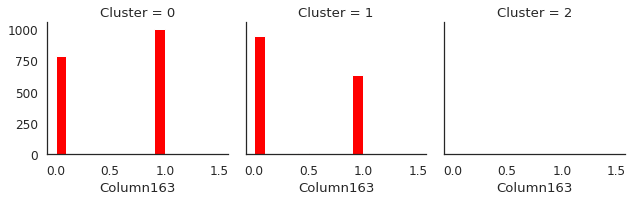

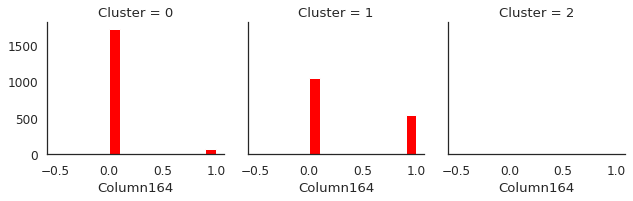

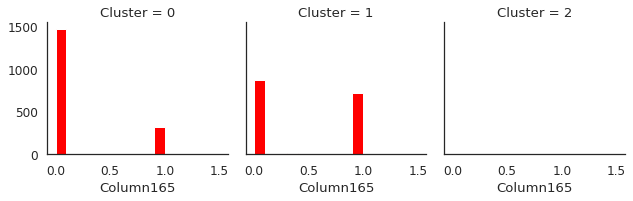

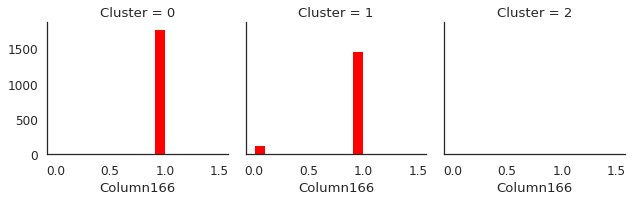

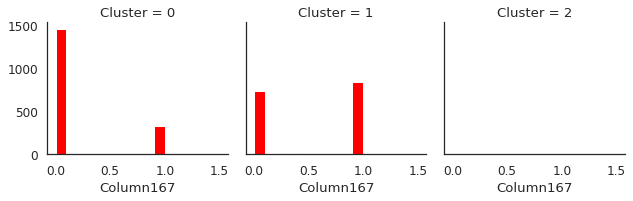

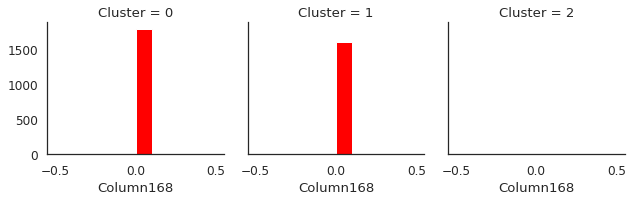

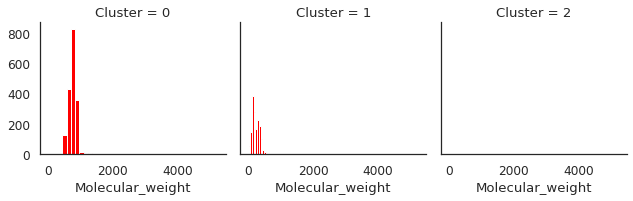

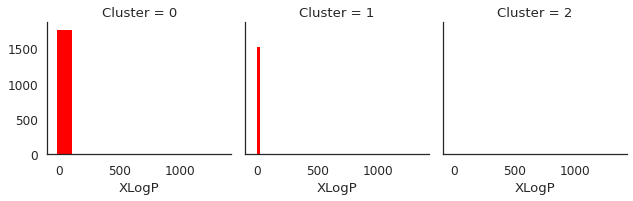

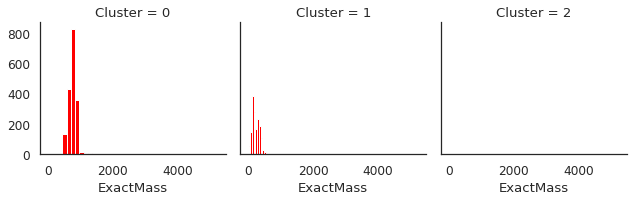

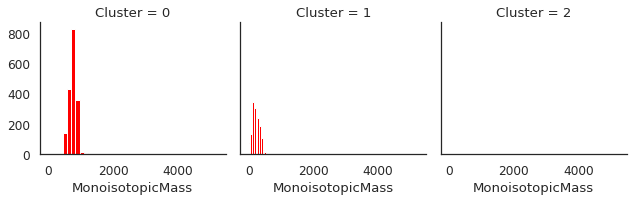

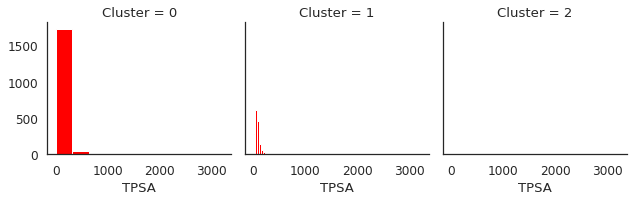

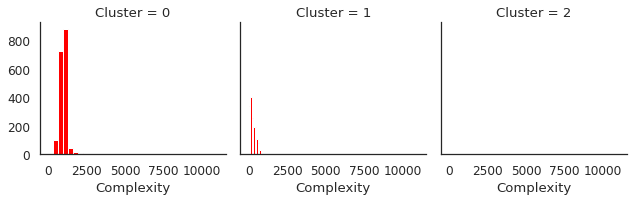

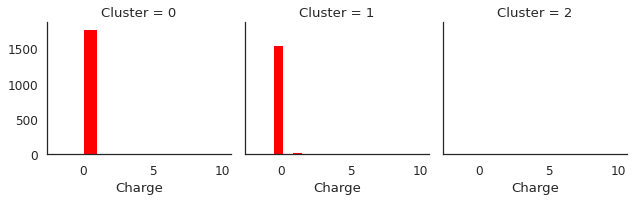

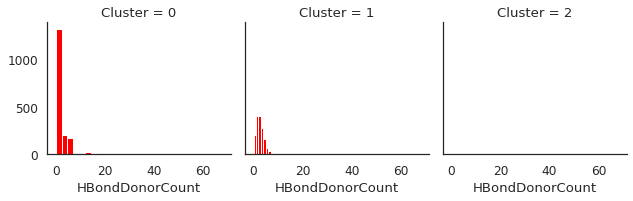

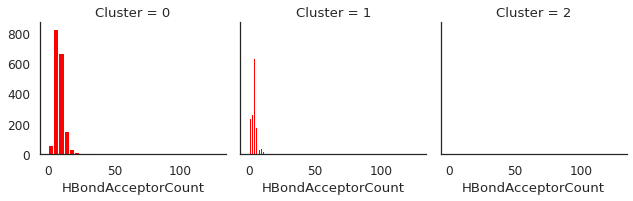

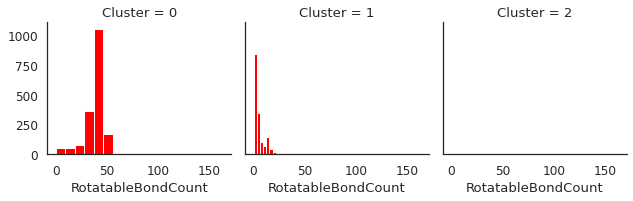

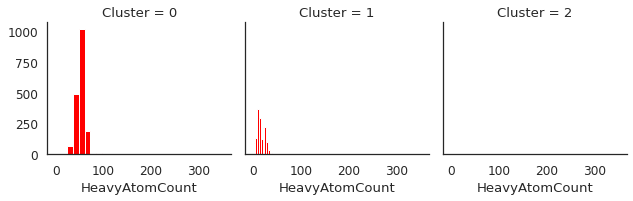

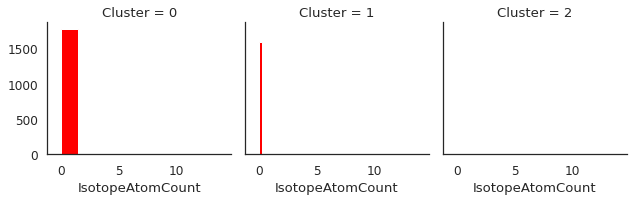

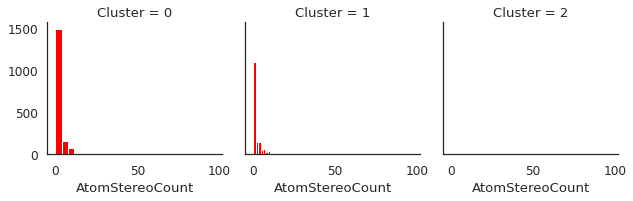

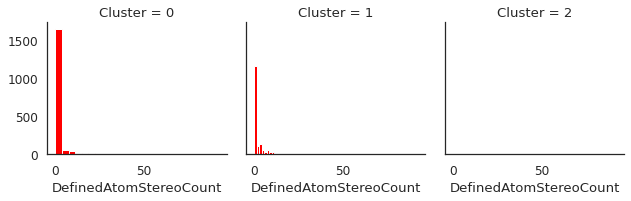

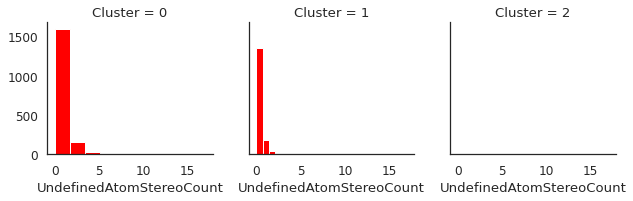

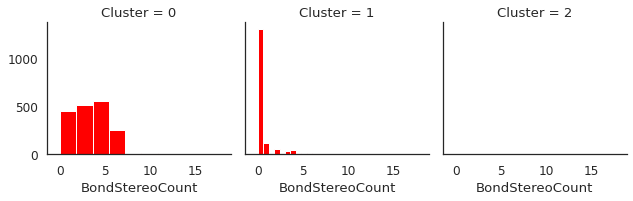

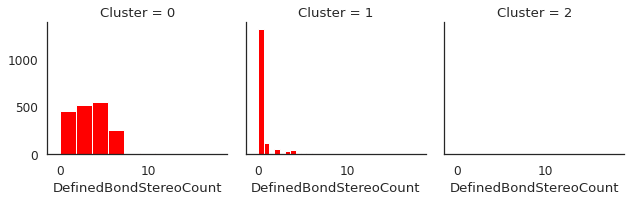

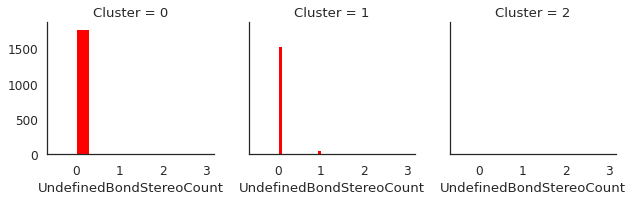

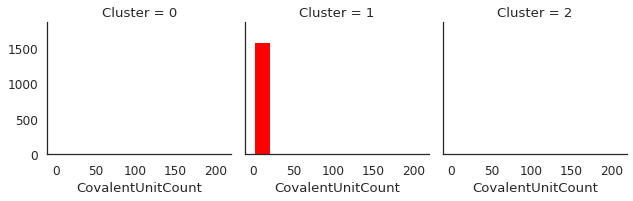

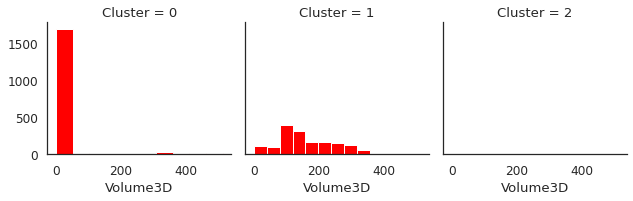

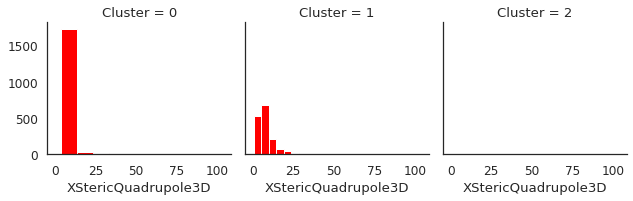

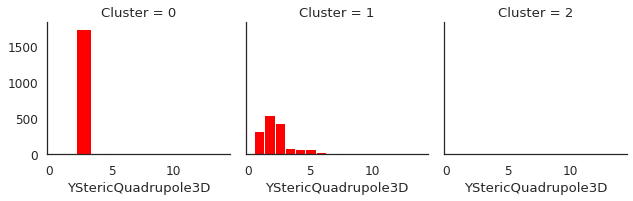

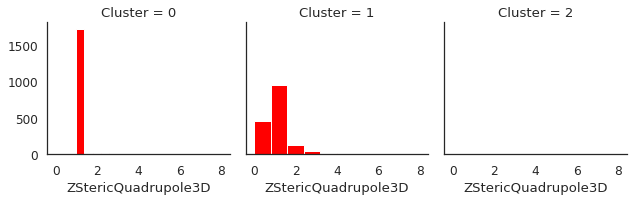

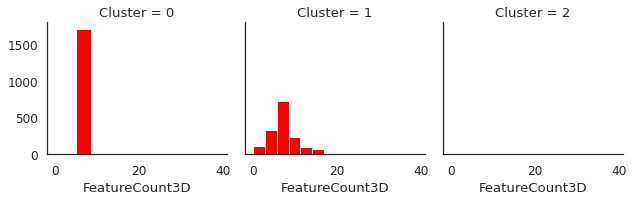

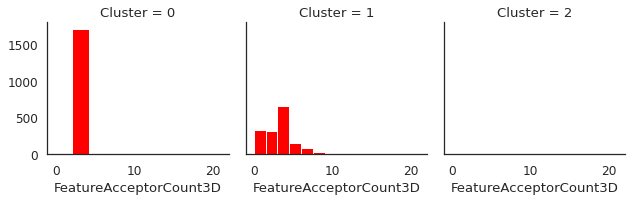

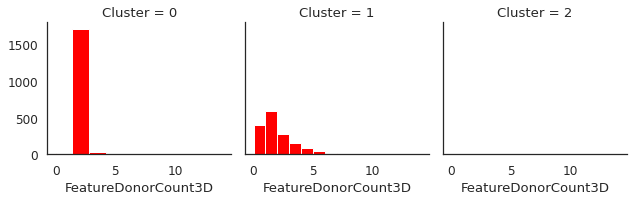

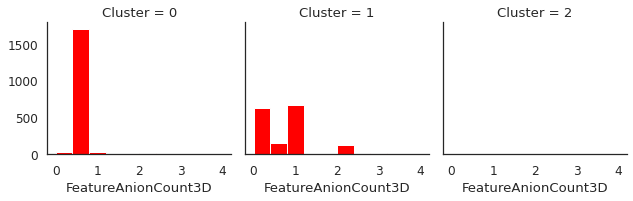

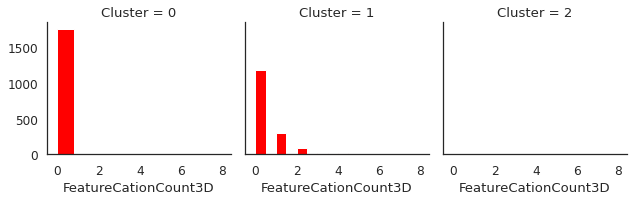

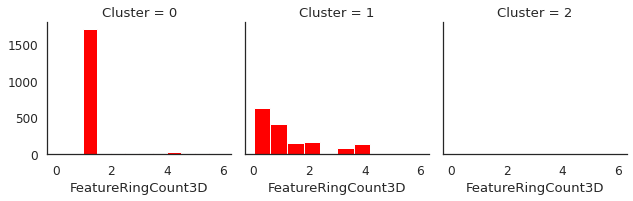

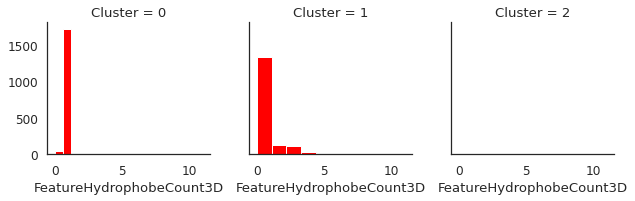

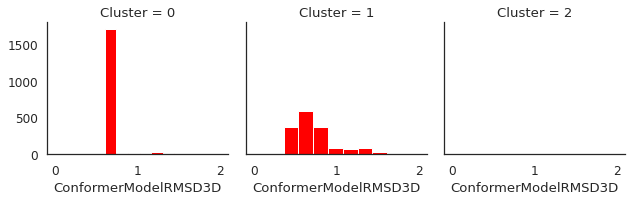

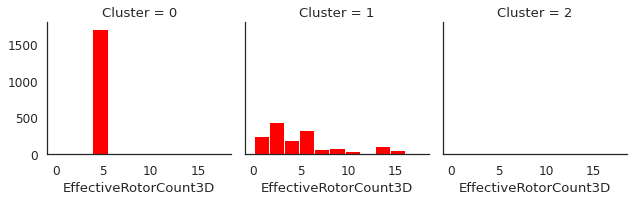

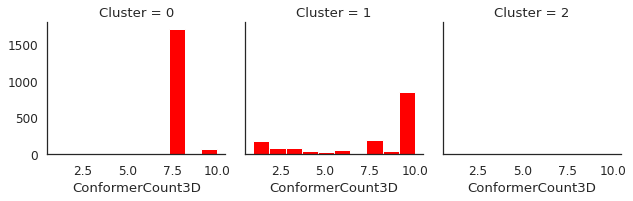

In [ ]:
data2=df.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster=df.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=df.columns)
centroids_data.head()

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
0,0.003842,0.000296,0.000591,0.005024,0.000296,0.001478,0.001182,0.002365,0.000887,0.005526,...,36.845628,9.822308,3.990612,1.048037,0.660047,2.522350,1.223818,0.887530,21.112557,25.439922
1,0.004346,0.000306,0.000621,0.005777,0.000306,0.001598,0.001269,0.002609,0.000943,0.005916,...,33.061957,8.848394,3.682124,1.029163,0.639302,2.307927,1.190310,0.878372,19.655562,24.976849
2,0.003842,0.000296,0.000591,0.005024,0.000296,0.001478,0.001182,0.002365,0.000887,0.005322,...,35.061722,9.363132,3.845168,1.039138,0.650267,2.421255,1.208020,0.883212,20.425620,25.221595


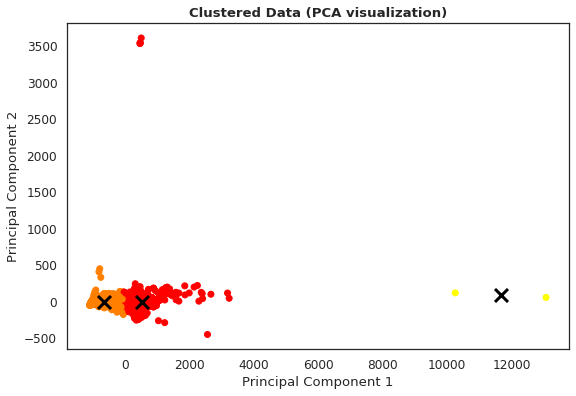

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

In [ ]:
# X= df.iloc[:,].values

In [ ]:
# from sklearn.cluster import KMeans
# wcss=[]

# #we always assume the max number of cluster would be 10
# #you can judge the number of clusters by doing averaging
# ###Static code to get max no of clusters

# for i in range(1,5):
#     kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

In [ ]:
# #Visualizing the ELBOW method to get the optimal value of K
# plt.plot(range(1,5), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('no of clusters')
# plt.ylabel('wcss')
# plt.show()

In [ ]:
# #Model Build
# kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
# y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()